In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')


from SALib.sample import saltelli
from SALib.analyze import sobol

import scipy 
from scipy.stats import ttest_ind

In [ ]:
df = pd.read_csv('/Users/casper/Documents/TU Della/Thesis/Finals Docs/Experiments/Sensi analysis/Final model New car sensi-table.csv', skiprows=6 ) 



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000050 entries, 0 to 5000049
Data columns (total 49 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   [run number]                                    int64  
 1   walking-radius                                  int64  
 2   prob-of-violating-rules                         int64  
 3   new-car-treshold                                float64
 4   number-of-cars-company0                         int64  
 5   graduated-sanctions                             bool   
 6   car-sharing-demand                              int64  
 7   number-of-companies                             int64  
 8   collective-choice-arrangement                   bool   
 9   One-company                                     bool   
 10  number-of-cars-company1                         int64  
 11  sanctioning-multiple                            int64  
 12  speed                       

In [4]:
df.rename(columns={'[run number]':'run number','[step]':'tick', '[ satisfied-users ] of company 0':'satisfied company 0',  '[ satisfied-users ] of company 1':'satisfied company 1', '[ satisfied-users ] of company 2': 'satisfied company 2', '[ unsatisfied-users ] of company 0':'unsatisfied company 0',  '[ unsatisfied-users ] of company 1':'unsatisfied company 1', '[ unsatisfied-users ] of company 2': 'unsatisfied company 2', 'count cars with [ ( company-id = company 0 ) ]': 'cars company 0', 'count cars with [ ( company-id = company 1 ) ]': 'cars company 1', 'count cars with [ ( company-id = company 2 ) ]': 'cars company 2'  }, inplace= True) 
df ['total satisfied users'] = df['satisfied company 0'] + df['satisfied company 1'] + df['satisfied company 2'] 
df ['total unsatisfied users'] = df['unsatisfied company 0'] + df['unsatisfied company 1'] + df['unsatisfied company 2'] 
df ['total no parking found'] = df['[ no-parking ] of company 0'] + df['[ no-parking ] of company 1'] + df['[ no-parking ] of company 2']
df ['total profit'] = df[ '[ profit ] of company 0'] + df[ '[ profit ] of company 1'] + df[ '[ profit ] of company 2'] 
df.rename(columns={ '[ no-parking ] of company 0': 'no parking company 0', '[ no-parking ] of company 1': 'no parking company 1', '[ no-parking ] of company 2': 'no parking company 2', '[ company-price ] of company 0': 'price company 0', '[ company-price ] of company 1': 'price company 1', '[ company-price ] of company 2': 'price company 2', '[ profit ] of company 0': 'profit company 0', '[ profit ] of company 1': 'profit company 1', '[ profit ] of company 2': 'profit company 2'}, inplace= True)

In [5]:
df1 = df.drop(columns=['walking-radius', 'prob-of-violating-rules', 'new-car-treshold', 'number-of-cars-company0', 'number-of-cars-company1', 'number-of-cars-company2', 'number-of-companies', 'One-company', 'speed', '[ vote ] of company 0', '[ vote ] of company 1', '[ vote ] of company 2', 'prob-of-sanctioning', '[ company-rules-violated ] of company 0', '[ company-rules-violated ] of company 1', '[ company-rules-violated ] of company 2', '[ company-sanctioned ] of company 0', '[ company-sanctioned ] of company 1', '[ company-sanctioned ] of company 2', 'car-sharing-demand'])

In [6]:
list(df1.columns)

['run number',
 'graduated-sanctions',
 'collective-choice-arrangement',
 'sanctioning-multiple',
 'starting-bottom-price',
 'tick',
 'satisfied company 0',
 'unsatisfied company 0',
 'satisfied company 1',
 'unsatisfied company 1',
 'satisfied company 2',
 'unsatisfied company 2',
 'price company 0',
 'price company 1',
 'price company 2',
 'profit company 0',
 'profit company 1',
 'profit company 2',
 'cars company 0',
 'cars company 1',
 'cars company 2',
 'count users',
 'market-price',
 'bottom-price',
 'count cars with [ available = true ]',
 'count patches with [ empty = true ]',
 'no parking company 0',
 'no parking company 1',
 'no parking company 2',
 'total satisfied users',
 'total unsatisfied users',
 'total no parking found',
 'total profit']

In [7]:
df1.head(5)

,run number,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,tick,satisfied company 0,unsatisfied company 0,satisfied company 1,unsatisfied company 1,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
0,1,False,False,20,10,0,0,0,0,0,...,10,600,489,0,0,0,0,0,0,0.0
1,2,False,False,20,10,0,0,0,0,0,...,10,600,489,0,0,0,0,0,0,0.0
2,4,False,False,20,10,0,0,0,0,0,...,10,600,489,0,0,0,0,0,0,0.0
3,3,False,False,20,10,0,0,0,0,0,...,10,600,489,0,0,0,0,0,0,0.0
4,2,False,False,20,10,1,0,0,0,0,...,10,600,489,0,0,0,0,0,0,0.0


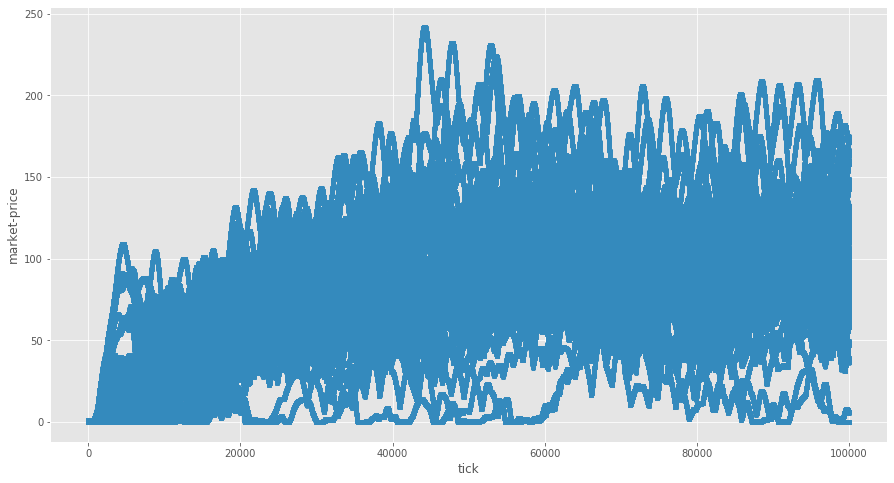

In [8]:
df1.plot.scatter(x='tick',y='market-price',figsize=(15,8))

In [ ]:
df1.plot.scatter(x='tick',y='market-price',c='run number',colormap='plasma',figsize=(20,10))

In [ ]:
df1.plot.scatter(x='tick',y='bottom-price',c='run number',colormap='plasma',figsize=(20,10))

In [ ]:
df1.plot.scatter(x='tick',y='count patches with [ empty = true ]',c='run number',colormap='plasma',figsize=(20,10))

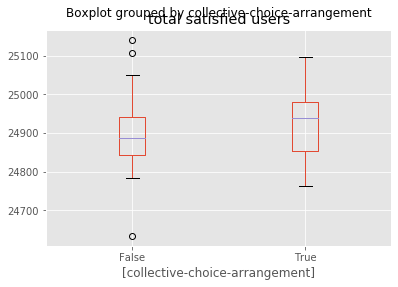

In [12]:
df1.loc[df1['tick'] == 100000].boxplot(column=['total satisfied users'], by=['collective-choice-arrangement'])
 
plt.show()

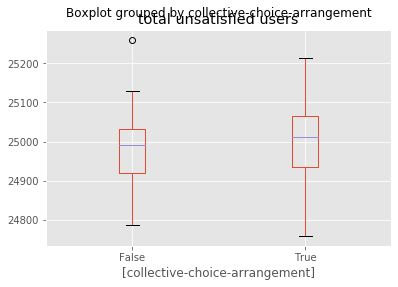

In [13]:
df1.loc[df1['tick'] == 100000].boxplot(column=['total unsatisfied users'], by=['collective-choice-arrangement'])

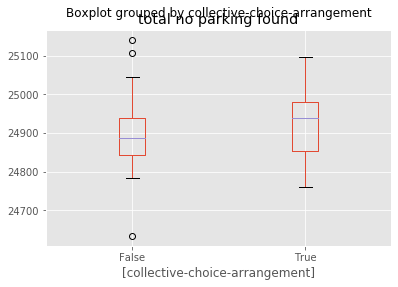

In [14]:
df1.loc[df1['tick'] == 100000].boxplot(column=['total no parking found'], by=['collective-choice-arrangement'])

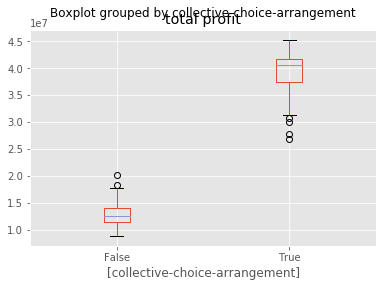

In [15]:
df1.loc[df1['tick'] == 100000].boxplot(column=['total profit'], by=['collective-choice-arrangement'])

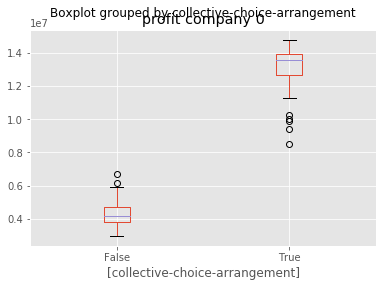

In [16]:
df1.loc[df1['tick'] == 100000].boxplot(column=['profit company 0'], by=['collective-choice-arrangement'])

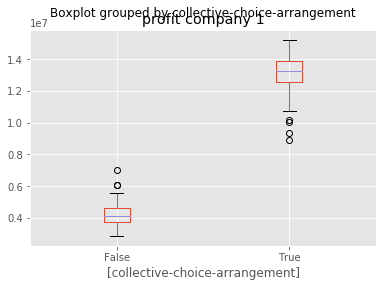

In [17]:
df1.loc[df1['tick'] == 100000].boxplot(column=['profit company 1'], by=['collective-choice-arrangement'])

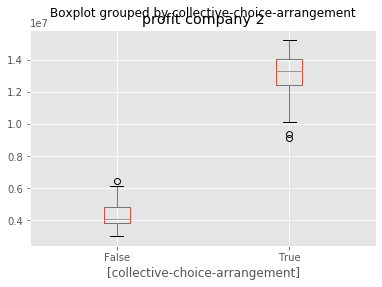

In [18]:
df1.loc[df1['tick'] == 100000].boxplot(column=['profit company 2'], by=['collective-choice-arrangement'])

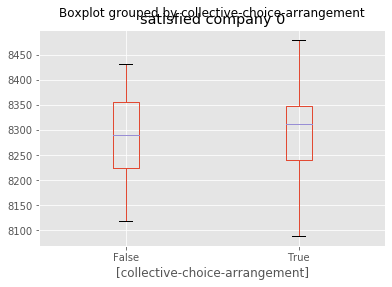

In [19]:
df1.loc[df1['tick'] == 100000].boxplot(column=['satisfied company 0'], by=['collective-choice-arrangement'])

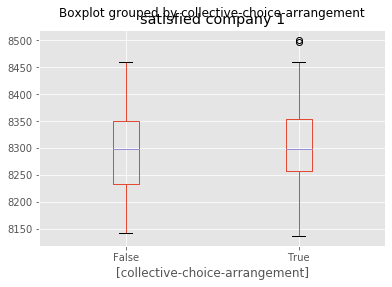

In [20]:
df1.loc[df1['tick'] == 100000].boxplot(column=['satisfied company 1'], by=['collective-choice-arrangement'])

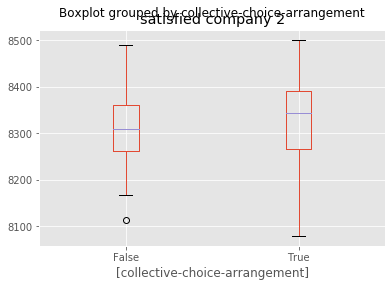

In [21]:
df1.loc[df1['tick'] == 100000].boxplot(column=['satisfied company 2'], by=['collective-choice-arrangement'])

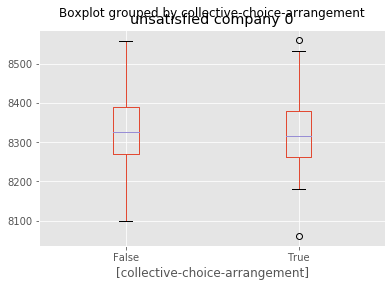

In [22]:
df1.loc[df1['tick'] == 100000].boxplot(column=['unsatisfied company 0'], by=['collective-choice-arrangement'])

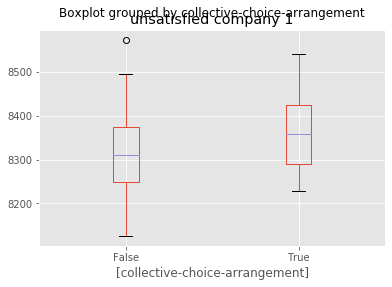

In [23]:
df1.loc[df1['tick'] == 100000].boxplot(column=['unsatisfied company 1'], by=['collective-choice-arrangement'])

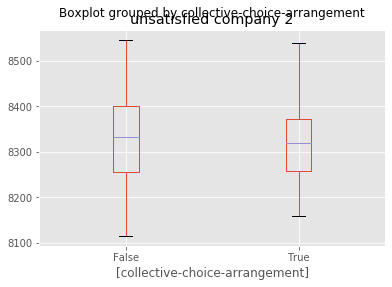

In [24]:
df1.loc[df1['tick'] == 100000].boxplot(column=['unsatisfied company 2'], by=['collective-choice-arrangement'])

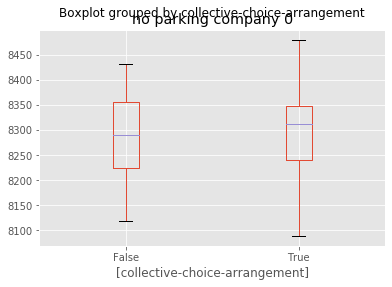

In [25]:
df1.loc[df1['tick'] == 100000].boxplot(column=['no parking company 0'], by=['collective-choice-arrangement'])

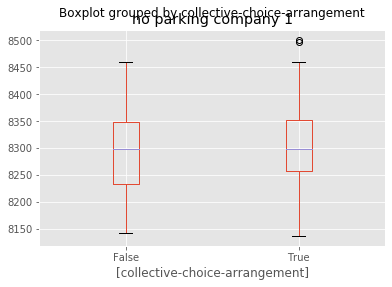

In [26]:
df1.loc[df1['tick'] == 100000].boxplot(column=['no parking company 1'], by=['collective-choice-arrangement'])

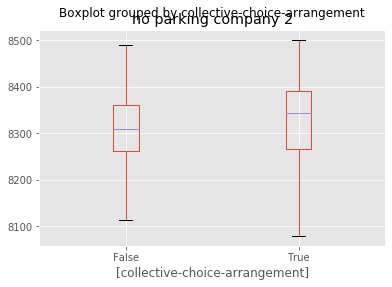

In [27]:
df1.loc[df1['tick'] == 100000].boxplot(column=['no parking company 2'], by=['collective-choice-arrangement'])

In [28]:
df2 = df1.loc[df1['collective-choice-arrangement'] == True ]
df2.head(5)

,run number,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,tick,satisfied company 0,unsatisfied company 0,satisfied company 1,unsatisfied company 1,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
0,4,False,True,20,10,0,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
1,2,False,True,20,10,0,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
2,3,False,True,20,10,0,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
3,1,False,True,20,10,0,0,0,0,0,...,10.000,600,489,0,0,0,0,0,0,0.0
4,3,False,True,20,10,1,0,0,0,0,...,9.997,600,489,0,0,0,0,0,0,0.0


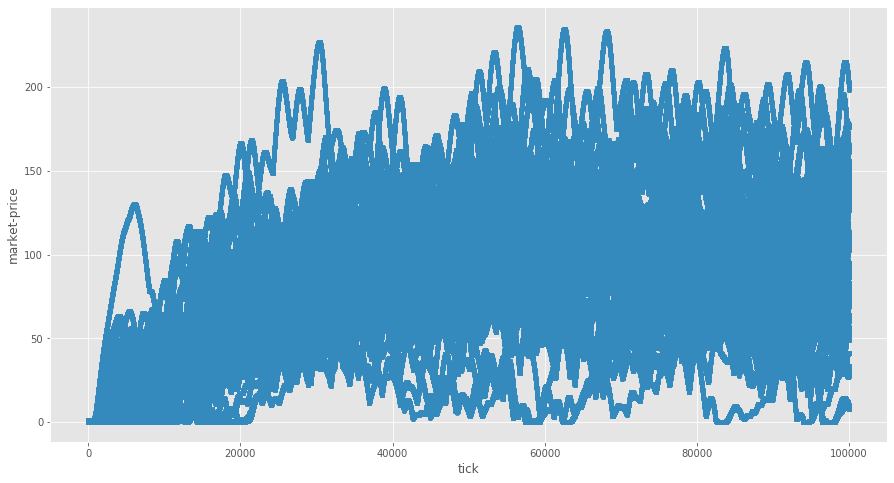

In [29]:
df3 = df1.loc[df1['collective-choice-arrangement'] == False ]
df3.head(5)
df3.plot.scatter(x='tick',y='market-price',figsize=(15,8))

In [30]:
df3.agg([np.mean, np.std])

,run number,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,tick,satisfied company 0,unsatisfied company 0,satisfied company 1,unsatisfied company 1,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
mean,75.500000,0.0,0.0,20.0,10.0,50000.00000,4135.957516,4158.544984,4135.799654,4158.657833,...,10.0,500.245091,588.754909,4135.890809,4135.687599,4141.683453,12413.609857,12481.675191,12413.261861,5.824455e+06
std,14.430871,0.0,0.0,0.0,0.0,28867.80502,2401.896546,2407.339849,2401.867990,2408.343137,...,0.0,22.915965,22.915965,2401.860777,2401.803724,2404.293484,7205.140934,7222.587076,7204.960438,4.265693e+06


<ErrorbarContainer object of 3 artists>

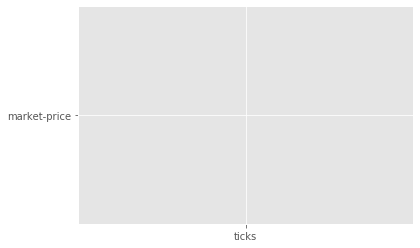

In [31]:
plt.errorbar(x = 'ticks', y = 'market-price')

In [36]:
df3_mean = df3['market-price'].mean()
print(df3_mean)
df3_std = df3['market-price'].std()
print(df3_std)

81.360209201884
44.23059563549653


In [40]:
df3_mean2 = df3['count patches with [ empty = true ]'].mean()
print(df3_mean2)
df3_std2 = df3['count patches with [ empty = true ]'].std()
print(df3_std2)

588.7549088509115
22.915964918408957


In [41]:
df3_mean1 = df3['bottom-price'].mean()
print(df3_mean1)
df3_std1 = df3['bottom-price'].std()
print(df3_std1)

10.0
0.0


In [42]:
df2_mean = df2['market-price'].mean()
print(df2_mean)
df2_std = df2['market-price'].std()
print(df2_std)

132.32321760778248
65.56962740622208


In [43]:
df2_mean1 = df2['bottom-price'].mean()
print(df2_mean1)
df2_std1 = df2['bottom-price'].std()
print(df2_std1)

50.42042889811483
26.69735112118578


In [44]:
df2_mean2 = df2['count patches with [ empty = true ]'].mean()
print(df2_mean2)
df2_std2 = df2['count patches with [ empty = true ]'].std()
print(df2_std2)

588.9641507584925
22.506129602077504
